In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [8]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

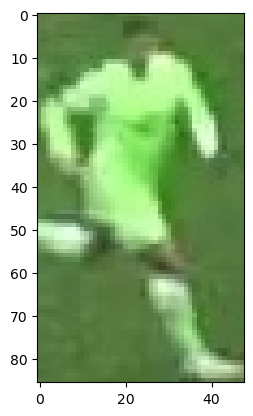

In [9]:
plt.imshow(image)
plt.show()

## Take top half of the image

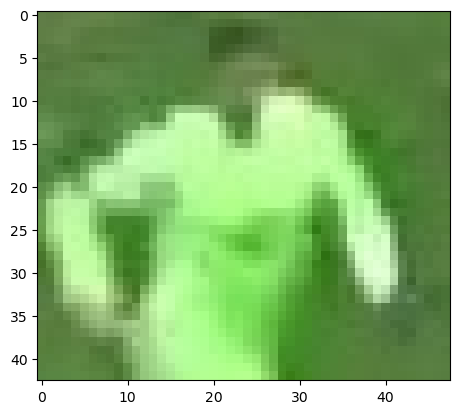

In [10]:
top_half_image = image[0: int(image.shape[0]/2), : ]
plt.imshow(top_half_image)
plt.show()

## Clustering image into two clusters

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


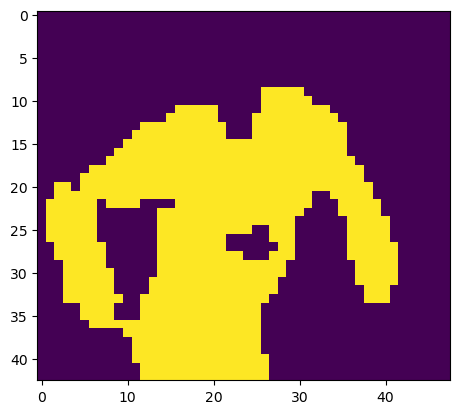

In [12]:
# reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform KMean clustering with 2 clusters
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

# get cluster labels
labels = kmeans.labels_

# reshape the image into original image shape
clustered_image = labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

# display clustered image
plt.imshow(clustered_image)
plt.show()

In [13]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1],clustered_image[-1, 0],clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters),key=corner_clusters.count)
print(non_player_cluster)

0


In [14]:
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [15]:
kmeans.cluster_centers_[player_cluster]

array([170.35582011, 235.78042328, 142.20238095])